In [1]:

import re
import os
import pathlib
import json
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import gridspec
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(style="darkgrid")

# Root of the project
project_dir = pathlib.Path().resolve().parent

# Directory containing experiment results
results_dir = (pathlib.Path(project_dir) / "results").resolve()

# Directory for tidied data (output directory)
data_dir = (pathlib.Path(project_dir) / "data").resolve()

# Directory to store all plots
plot_dir = (pathlib.Path(project_dir) / "plots").resolve()


# Experiment constants
exp_name = "02_http_constant_throughput"
file_prefix = "exp-02"

In [5]:
"""Load and prepare the dataset

resource_df -> CPU/Mem utilization for experiments
fortio_df -> Load test results from fortio
"""

# df = pd.read_feather(data_dir / "resource_results.feather")
df = pd.read_feather(data_dir / "fortio_results.feather")

# df = df[df["experiment"] == exp_name]
df = df.drop("actual_qps", 1)
df = df.explode("latency")
df = df.reset_index(drop=True)
df = df.astype({
    "experiment": "category",
    "mesh": "category",
    "requested_qps": "category",
    "payload": "category",
    "protocol": "category",
    "latency": np.float64,
})

# df["requested_qps"] = df["requested_qps"].cat.reorder_categories(["1", "100", "500", "1000"])

df = df.sort_values("mesh", ascending=True)

df.head()

,experiment,mesh,requested_qps,protocol,payload,latency
43128719,01_http_max_throughput,Baseline,MAX,http,0,1.130952
43373837,01_http_max_throughput,Baseline,MAX,http,0,1.190160
43373838,01_http_max_throughput,Baseline,MAX,http,0,1.130244
43373839,01_http_max_throughput,Baseline,MAX,http,0,1.135324
43373840,01_http_max_throughput,Baseline,MAX,http,0,1.169766


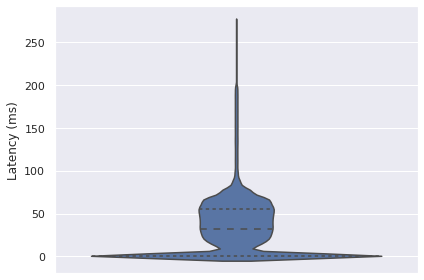

In [12]:


data = df[df["mesh"] == "Traefik"]
data = data[data["requested_qps"] == "500"]

fig, ax = plt.subplots()

# sns.violinplot(data=data[data["latency"] < 100], y="latency", inner="quartile", ax=ax)
ax = sns.violinplot(data=data, y="latency", inner="quartile", ax=ax)

ax.set_ylabel("Latency (ms)")

fig.tight_layout()
# fig.savefig(plot_dir / file_name)

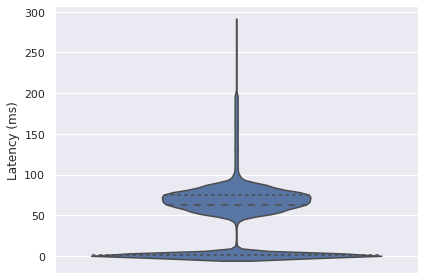

In [17]:
data = df[df["mesh"] == "Traefik"]
data = data[data["requested_qps"] == "1000"]

fig, ax = plt.subplots()

# sns.violinplot(data=data, y="latency")
ax = sns.violinplot(data=data, y="latency", inner="quartile", ax=ax)

ax.set_ylabel("Latency (ms)")

fig.tight_layout()
# fig.savefig(plot_dir / file_name)

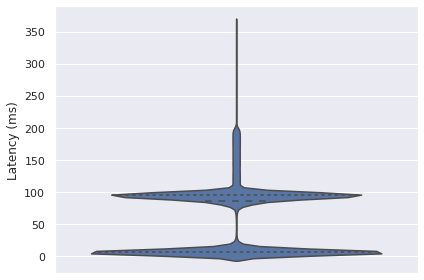

In [16]:
data = df[df["mesh"] == "Traefik"]
data = data[data["requested_qps"] == "MAX"]

fig, ax = plt.subplots()

# sns.violinplot(data=data, y="latency")
ax = sns.violinplot(data=data, y="latency", inner="quartile", ax=ax)

ax.set_ylabel("Latency (ms)")

fig.tight_layout()
# fig.savefig(plot_dir / file_name)

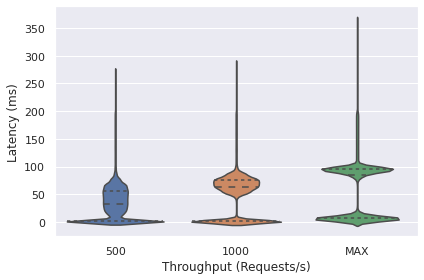

In [24]:
file_name = f"{file_prefix}-bottleneck-traefik.pdf"

data = df[df["mesh"] == "Traefik"]

fig, ax = plt.subplots()

# sns.violinplot(data=data, y="latency")
ax = sns.violinplot(data=data, x="requested_qps", y="latency", order=["500", "1000", "MAX"], inner="quartile", ax=ax)

ax.set_xlabel("Throughput (Requests/s)")
ax.set_ylabel("Latency (ms)")

fig.tight_layout()
fig.savefig(plot_dir / file_name)